<a href="https://colab.research.google.com/github/Henriquedelira/machinelearning1/blob/main/Trabalho_ADA_Machine_Learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho ADA - Machine Learning 1


Aluno: Henrique Santos de Lira n° 1116018

###Objetivo do trabalho:

Aplicar os conceitos da matéria ML 1  em um conjunto de dados extraido do Kaggle, atráves de Utilização do Scikit-learn / KNNs / Random Forests / Métricas de Avaliação de Modelos de Classificação / Otimização de hiperparâmetros.

###Dataset utilizado:

O dataset escolhido foi "Breast Cancer Wisconsin (Diagnostic) Data Set" disponível no link https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data

Neste dataset, são informadas características a partir de imagens digitalizadas de um aspirador em uma massa mamária. A variável alvo (target) é a natureza do câncer, sendo maligno (positivo)  ou benigno (negativo).

###Motivação:

Comparar os metodos KNN e Random Forests, passando por Scikit-learn, e hiperparâmetros para identificar o melhor modelo.

##Importando as bibliotecas

Vamos importar primeiramente o NumPy e Pandas, para trabalhar com operações matemáticas, dataframes entre outras ferramentas disponíveis nessas bibliotecas.

Depois utilizaremos Matplotlib e Seaborn para gráficos e plotagens.

Por fim, aplicaremos as biliotecas Scikit-Learn e Scipy para Machine Learning.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import cross_val_score

import scipy as scp
from scipy.stats import randint

import random

##Dataset

O dataset escolhido contém informações sobre o diagnóstico de câncer de mama, incluindo características das células presentes nos exames.

Por ser um problema de classificação, a variável target é o diagnóstico, que é maligno (M) ou benigno (B).

A escolha é justificada pela relevância do tema, pois se um modelo de ML conseguir classificar o tipo de cancêr através de características presentes nos exames, conseguimos diagnósticos mais precoces e com isso aumentamos a taxa de sobrevivência.

Tabela com todas as colunas e sua descrição:

| Coluna       | Descrição                                                  |
|------------------------|------------------------------------------------------------|
| ID                     | Identificador único para cada paciente                    |
| Diagnosis              | Indica se o diagnóstico é maligno (M) ou benigno (B).     |
| Radius (mean)          | Média dos raios das células.                              |
| Texture (mean)         | Média das texturas das células.                           |
| Perimeter (mean)       | Média dos perímetros das células.                         |
| Area (mean)            | Média das áreas das células.                              |
| Smoothness (mean)      | Média da suavidade das células.                           |
| Compactness (mean)     | Média da compacidade das células.                         |
| Concavity (mean)       | Média da concavidade das células.                         |
| Concave points (mean)  | Média dos pontos côncavos das células.                    |
| Symmetry (mean)        | Média da simetria das células.                            |
| Fractal dimension (mean)| Média da dimensão fractal das células.                    |
| Radius (se)            | Erro padrão do raio das células.                          |
| Texture (se)           | Erro padrão da textura das células.                       |
| Perimeter (se)         | Erro padrão do perímetro das células.                     |
| Area (se)              | Erro padrão da área das células.                          |
| Smoothness (se)        | Erro padrão da suavidade das células.                     |
| Compactness (se)       | Erro padrão da compacidade das células.                   |
| Concavity (se)         | Erro padrão da concavidade das células.                   |
| Concave points (se)    | Erro padrão dos pontos côncavos das células.              |
| Symmetry (se)          | Erro padrão da simetria das células.                      |
| Fractal dimension (se) | Erro padrão da dimensão fractal das células.              |
| Radius (worst)         | Pior valor dos raios das células.                         |
| Texture (worst)        | Pior valor das texturas das células.                      |
| Perimeter (worst)      | Pior valor dos perímetros das células.                    |
| Area (worst)           | Pior valor das áreas das células.                         |
| Smoothness (worst)     | Pior valor da suavidade das células.                      |
| Compactness (worst)    | Pior valor da compacidade das células.                    |
| Concavity (worst)      | Pior valor da concavidade das células.                    |
| Concave points (worst) | Pior valor dos pontos côncavos das células.               |
| Symmetry (worst)       | Pior valor da simetria das células.                       |
| Fractal dimension (worst)| Pior valor da dimensão fractal das células.               |


##Importação do dataset

In [2]:
#Acessando o google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importando os dados do drive
df_inicial = pd.read_csv('/content/drive/MyDrive/dados cancer.csv',engine='python', sep=',')

In [4]:
#Visualizando os dados do df_inicial
df_inicial.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#Deletando a coluna 'Unnamed: 32' que é indevida em nosso df
df_inicial = df_inicial.drop(columns=['Unnamed: 32'])

In [6]:
#Verificando a dimensão do df_inicial
df_inicial.shape

(569, 32)

Reafirmando, temos 32 colunas, e agora visualizamos 569 linhas de dados.

##Explorando os dados

Agora vamos realizar uma exploração dos dados importados, visualizando como cada dado está distribuido (análise univariada) no dataframe:

In [7]:
#Exibindo as últimas linhas do df_inicial
df_inicial.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [8]:
#Visualizando as informações do df_inicial
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
#Visualizando as estatísticas descritivas do df_inicial
df_inicial.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
#Visualizando as estatísticas descritivas do df_inicial referente a coluna de texto (diagnosis)
df_inicial[['diagnosis']].describe()

,diagnosis
count,569
unique,2
top,B
freq,357


In [11]:
#Visualizando os valores ausentes no df_inicial
df_inicial.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

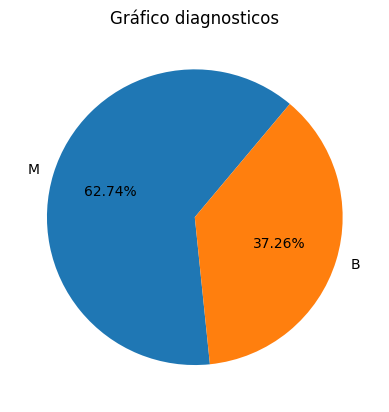

In [12]:
plt.title('Gráfico diagnosticos')
plt.pie(df_inicial['diagnosis'].value_counts(), labels=df_inicial['diagnosis'].unique(), autopct='%1.2f%%', startangle=50)
plt.show()

Após a exploração dos dados, podemos concluir que temos apenas uma coluna categórica e as demais são numéricas, além disso não foi localizado valores nulos e com isso não precisaremos aplicar nenhum ajuste no dataframe.

Importante frisar que 62,74% da base são referentes a cancêr maligno e 37,26% benigno.

##Pré Processamento dos dados

##Tratamento de Variáveis Categóricas

In [13]:
#Convertendo a variável categórica 'diagnosis' em numérica - M=1 e B=0
df_inicial['diagnosis'] = df_inicial['diagnosis'].map({'M': 1, 'B': 0})

##Seleção de Features

Vamos selecionar agora quais as colunas relevantes para o nosso projeto, para isso vamos utilizar a correlação de PERARSON entre as colunas numéricas e a coluna diagnosis.

In [14]:
#Calculando a correlação de Pearson
correlacao = df_inicial.corr()['diagnosis'].abs().sort_values(ascending=False)
#Visualizando o resultado
correlacao

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

In [15]:
#Selecionando apenas as colunas onde a correlação é maior do que 0.6
alta_correlacao = correlacao[correlacao > 0.6].index.tolist()
#Visualizando o resultado
alta_correlacao

['diagnosis',
 'concave points_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_mean',
 'area_worst',
 'radius_mean',
 'area_mean',
 'concavity_mean',
 'concavity_worst']

In [16]:
#Criando o novo df apenas com as colunas que possuem alta correlacao
df_alta_correlacao = df_inicial[alta_correlacao]
#Visualizando o resultado
df_alta_correlacao

,diagnosis,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst
0,1,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,0.30010,0.7119
1,1,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,0.08690,0.2416
2,1,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,0.19740,0.4504
3,1,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,0.24140,0.6869
4,1,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,0.19800,0.4000
...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,0.24390,0.4107
565,1,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,0.14400,0.3215
566,1,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,0.09251,0.3403
567,1,0.2650,184.60,0.15200,25.740,140.10,1821.0,20.60,1265.0,0.35140,0.9387


##Split

Separando os dados em X para variáveis preditoras e y para target.

In [17]:
#Criando o dataframe X sem a coluna diagnosis
X = df_alta_correlacao.drop('diagnosis', axis=1)
#Visualizando o df X
X.head()

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst
0,0.2654,184.60,0.14710,25.38,122.80,2019.0,17.99,1001.0,0.3001,0.7119
1,0.1860,158.80,0.07017,24.99,132.90,1956.0,20.57,1326.0,0.0869,0.2416
2,0.2430,152.50,0.12790,23.57,130.00,1709.0,19.69,1203.0,0.1974,0.4504
3,0.2575,98.87,0.10520,14.91,77.58,567.7,11.42,386.1,0.2414,0.6869
4,0.1625,152.20,0.10430,22.54,135.10,1575.0,20.29,1297.0,0.1980,0.4000


In [18]:
X.shape

(569, 10)

In [19]:
#Criando o datagrame y, apenas com a coluna diagnosis
y= df_alta_correlacao['diagnosis']
#Visualizando o df y
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [20]:
y.shape

(569,)

In [21]:
y.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [22]:
#Proporção de M e B
y.value_counts(normalize=True)

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

##Split de Treino e Teste

Nesta etapa, aplicaremos uma técnica fundamental em ML para avaliar o desempenho de um modelo. Para isso, vamos dividir em dois subconjuntos:


*   Conjunto de Treinamento: Esta porção dos dados é utilizada para ajustar os parâmetros do modelo.
*   Conjunto de Teste: Este conjunto é reservado para avaliar o desempenho do modelo já treinado. Ele contém dados que não foram utilizados durante o treinamento e é crucial para validar a capacidade de generalização do modelo. Aqui, são feitas previsões utilizando o modelo treinado e são calculadas métricas de avaliação, tais como precisão, recall, F1-score, entre outras, para avaliar sua eficácia em dados não vistos.

In [23]:
#Dividindo o dataframe em treinamento e teste (80% para treinamento, 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape

(455, 10)

In [25]:
X_test.shape

(114, 10)

In [26]:
y_train.value_counts()

diagnosis
0    286
1    169
Name: count, dtype: int64

In [27]:
y_test.value_counts()

diagnosis
0    71
1    43
Name: count, dtype: int64

Conforme mencionado anteriormente, foi realizada a separação 80/20, ficando 455 registros na base de treino e 114 na base teste.

##Normalização dos dados numéricos


Essa etapa também é chamada de Feature Scaling, onde ajustamos a escala numérica das colunas para que todas estejam dentro da mesma escala de valor. Isso é fundamental já que diferentes variáveis podem ter escalas distintas, e com isso distorce o nosso algoritmo de ML.

O método mais comum é o StandardScaler, que padroniza os valores removendo a média e dimensionando para a variância unitária. Isso resulta em uma distribuição com média zero e desvio padrão igual a 1 para cada característica.

In [28]:
#Utilizando o StandardScaler
scaler = StandardScaler()

#Aplicando na base de treino
X_train_scaled = scaler.fit_transform(X_train)

#Aplicando na base de teste
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled[:,1].mean()

-2.928060724286127e-17

In [30]:
X_train_scaled[:,1].std()

1.0

#KNN

##Treinamento KNN

K-Nearest Neighbors (KNN) é um algoritmo de machine learning que pode ser usado tanto para regressão, quanto classificação.

In [31]:
#Aplicando o KNN para 10 vizinhos
knn = KNeighborsClassifier(n_neighbors=10)

#Treinando o modelo
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

##Teste do Modelo

Nessa etapa faremos a previsão sobre os dados da base de teste.

In [32]:
#Aplicando o KNN na base de teste
y_pred = knn.predict(X_test_scaled)

In [51]:
#Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("A matriz de Confusão:")
print(conf_matrix)

#Acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia deste modelo de KNN é:", accuracy)

A matriz de Confusão:
[[69  2]
 [ 4 39]]
Acurácia deste modelo de KNN é: 0.9473684210526315


In [34]:
#Área sobre a curva de ROC:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)

ROC AUC: 0.9464461185718964


<Figure size 800x600 with 0 Axes>

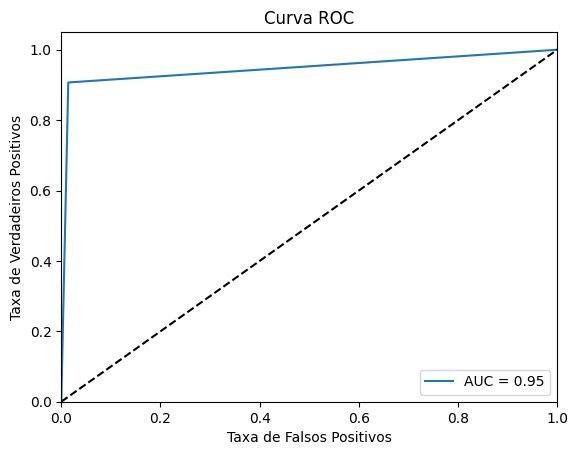

In [35]:
#Plotando a curva ROC com o AUC utilizando RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

Conclusão: A acurácia foi de aproximadamente 95.6% e uma área sob a curva ROC (ROC AUC) de aproximadamente 94.6%, ótimos resultados.

Na matriz de confusão:

Verdadeiros positivos (TP) = 39 - O modelo classificou corretamente 39 casos de câncer maligno.
Verdadeiros negativos (TN) = 70 - O modelo classificou corretamente 70 casos de câncer benigno.
Existem 4 falsos negativos (FN), que se referem a casos de câncer maligno que foram classificados indevidamente como benignos.
Temos 1 falso positivo (FP), um caso de câncer benigno que foi classificado incorretamente como maligno.
Diante disso, podemos afirmar que o modelo está com uma ótima classificação.

##Otimização de Hiperparâmetros


Vamos tentar melhorar a performance utilizando a otimização de hiperparâmetros.

In [36]:
error = []

# Calculando o erro médio na classificação para valores de k de 1 a 20
for k in range(1, 21):
    # Inicialize o classificador KNN com o valor atual de k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Treine o modelo KNN usando os dados de treinamento normalizados
    knn.fit(X_train_scaled, y_train)

    # Faça previsões no conjunto de teste
    y_pred = knn.predict(X_test_scaled)

    # Calcule o erro médio na classificação
    error.append(np.mean(y_pred != y_test))

# Exibindo o erro médio na classificação para cada valor de k
for k, err in enumerate(error, 1):
    print(f"Erro médio para k={k}: {err}")


Erro médio para k=1: 0.043859649122807015
Erro médio para k=2: 0.05263157894736842
Erro médio para k=3: 0.02631578947368421
Erro médio para k=4: 0.043859649122807015
Erro médio para k=5: 0.02631578947368421
Erro médio para k=6: 0.02631578947368421
Erro médio para k=7: 0.02631578947368421
Erro médio para k=8: 0.02631578947368421
Erro médio para k=9: 0.02631578947368421
Erro médio para k=10: 0.043859649122807015
Erro médio para k=11: 0.03508771929824561
Erro médio para k=12: 0.043859649122807015
Erro médio para k=13: 0.03508771929824561
Erro médio para k=14: 0.043859649122807015
Erro médio para k=15: 0.043859649122807015
Erro médio para k=16: 0.043859649122807015
Erro médio para k=17: 0.05263157894736842
Erro médio para k=18: 0.05263157894736842
Erro médio para k=19: 0.05263157894736842
Erro médio para k=20: 0.05263157894736842


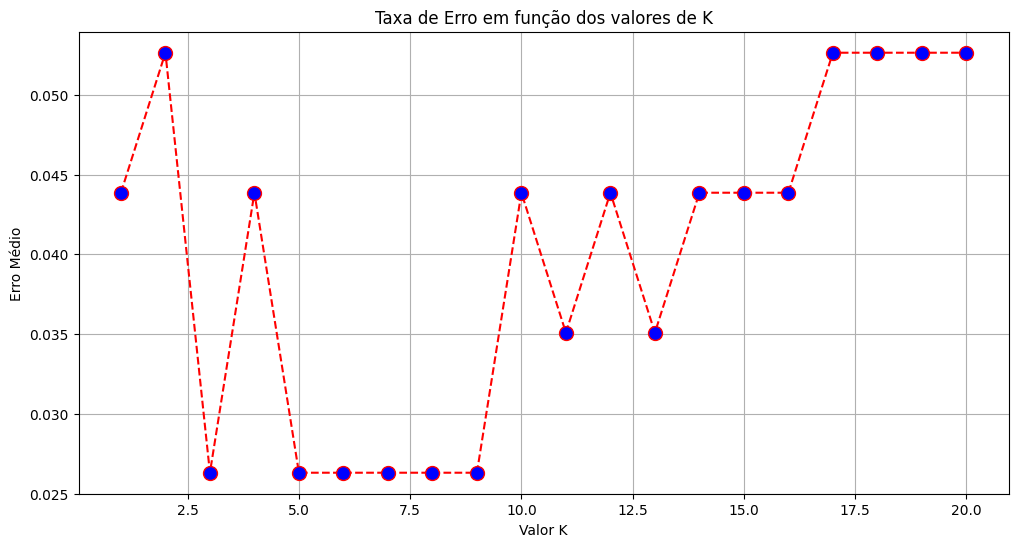

In [37]:
# Plotando o erro médio na classificação para cada valor de k
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taxa de Erro em função dos valores de K')
plt.xlabel('Valor K')
plt.ylabel('Erro Médio')
plt.grid(True)  # Adiciona uma grade ao gráfico
plt.show()

Com base nas informações acima, concluimos que os melhores valores de k são: k=3, k=5, k=6, k=7, k=8, k=9.

##Teste final otimizado


Escolhemos o k=3 para realização do teste final otimizado, tendo em vista que ele foi um dos melhores no teste anterior.

In [38]:
#Definindo KNN com k=3
knn_final = KNeighborsClassifier(n_neighbors=3)

#Treinando os modelos
knn_final.fit(X_train_scaled, y_train)

#Fazendo as previsões na base
y_pred_final = knn_final.predict(X_test_scaled)

#Calculando qual é o erro médio para esse teste
error_final = np.mean(y_pred_final != y_test)

#Matriz de confusão com base nesse teste
conf_matrix_final = confusion_matrix(y_test, y_pred_final)

#Calculando a acurácia com base nesse teste
accuracy_final = accuracy_score(y_test, y_pred_final)

#Definindo a área sob a curva ROC para esse teste
roc_auc_final = roc_auc_score(y_test, y_pred_final)

#Printando todos os resultados
print("Erro Médio na Classificação:", error_final)
print("Matriz de Confusão:")
print(conf_matrix_final)
print("Acurácia:", accuracy_final)
print("ROC AUC:", roc_auc_final)


Teste Final Otimizado:
Erro Médio na Classificação: 0.02631578947368421
Matriz de Confusão:
[[69  2]
 [ 1 42]]
Acurácia: 0.9736842105263158
ROC AUC: 0.9742875859810023


Identificamos que a Acuárcia foi melhor nesse teste se comparado com o valor anterior de 0.9473684210526315, assim como a ROC AUC que era de  0.9464461185718964.

Aplicando os conceitos e calculos anteriores na base teste.

In [41]:
#Definindo KNN com k=3
knn_final_teste = KNeighborsClassifier(n_neighbors=3)

#Treinando os modelos
knn_final_teste.fit(X_train_scaled, y_train)

#Fazendo as previsões na base teste
y_pred_final_teste = knn_final_teste.predict(X_test_scaled)

#Calculando qual é o erro médio para esse teste
error_final_teste = np.mean(y_pred_final_teste != y_test)

#Matriz de confusão com base nesse teste
conf_matrix_final_teste = confusion_matrix(y_test, y_pred_final_teste)

#Calculando a acurácia com base nesse teste
accuracy_final_teste = accuracy_score(y_test, y_pred_final_teste)

#Definindo a área sob a curva ROC para esse teste
roc_auc_final_teste = roc_auc_score(y_test, y_pred_final_teste)

#Printando todos os resultados
print("Erro Médio na Classificação:", error_final_teste)
print("Matriz de Confusão:")
print(conf_matrix_final_teste)
print("Acurácia:", accuracy_final_teste)
print("ROC AUC:", roc_auc_final_teste)


Teste Final Otimizado na Base de Teste:
Erro Médio na Classificação: 0.02631578947368421
Matriz de Confusão:
[[69  2]
 [ 1 42]]
Acurácia: 0.9736842105263158
ROC AUC: 0.9742875859810023


O número é praticamente o mesmo, sinal que o modelo está bem treinado.

##Base de Validação


In [42]:
#Definindo o KNN com k=3
knn_cv = KNeighborsClassifier(n_neighbors=3)

#Realizando a validação cruzada com 5
cv_scores = cross_val_score(knn_cv, X_train_scaled, y_train, cv=5)

#Valores de validação cruzada
print("Scores de Validação Cruzada:", cv_scores)

#Média dos scores de validação cruzada
print("Média dos Scores de Validação Cruzada:", np.mean(cv_scores))


Scores de Validação Cruzada: [0.91208791 0.94505495 0.96703297 0.94505495 0.92307692]
Média dos Scores de Validação Cruzada: 0.9384615384615385


Com base nesses scores podemos concluir que o modelo tem um bom desempenho m diferentes subconjuntos da base de treinamento.

##Treinamento do Modelo Random Forest


Vamos utilizar o Random Foreste para de maneira aleatória criar algumas Árvores de Decisão e depois combinar o resultado para chegar no resultado final.

In [44]:
#Definindo os parametros do Random Forest
rf = RandomForestClassifier(n_estimators=100,
                            criterion='gini',
                            max_depth=None,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            random_state=42)

#Treinando o modelo
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [45]:
y_pred_rf_train = rf.predict(X_train_scaled)

In [46]:
#Matriz de confusão de treino:
print("Matriz de Confusão: ")
print(confusion_matrix(y_train, y_pred_rf_train), "\n")

#Classificação de treino:
print("Métricas de classificação: \n", classification_report(y_train, y_pred_rf_train))

#Acurácia do modelo:
print('Acurácia: ' , accuracy_score(y_train, y_pred_rf_train))

Matriz de Confusão: 
[[286   0]
 [  1 168]] 

Métricas de classificação: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      0.99      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

Acurácia:  0.9978021978021978


A acurácia do modelo com Random Forest foi de incriveis 0.9978021978021978, número superior ao encontrado no KNN.

##Teste do Modelo

Testando a base teste

In [48]:
#Realizando as previsões na base de teste
y_pred_rf_test = rf.predict(X_test_scaled)

#Matriz de confusão  na base teste:
print("Matriz de Confusão nos Dados de Teste:")
print(confusion_matrix(y_test, y_pred_rf_test), "\n")

#Classificação  na base teste:
print("Métricas de Classificação nos Dados de Teste:\n", classification_report(y_test, y_pred_rf_test))

#Acurácia do modelo na base teste:
accuracy_test = accuracy_score(y_test, y_pred_rf_test)
print('Acurácia nos Dados de Teste: ', accuracy_test)


Matriz de Confusão nos Dados de Teste:
[[69  2]
 [ 3 40]] 

Métricas de Classificação nos Dados de Teste:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Acurácia nos Dados de Teste:  0.956140350877193


Aqui já identificamos uma queda na acurácia se comparado com a base de treino.

##Validação cruzada

Faremos agora uma validação cruzada utilizando a técnica k-fold com o Scikit-learn

In [50]:
# Definir o modelo Random Forest com os parâmetros desejados
rf = RandomForestClassifier(n_estimators=100,
                            criterion='gini',
                            max_depth=None,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            random_state=42)

# Realizar validação cruzada com 5 folds
scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)

# Exibir os scores de validação cruzada
print("Scores de Validação Cruzada:", scores)

# Calcular a média dos scores de validação cruzada
mean_score = scores.mean()
print("Média dos Scores de Validação Cruzada:", mean_score)

Scores de Validação Cruzada: [0.95604396 0.93406593 0.97802198 0.94505495 0.93406593]
Média dos Scores de Validação Cruzada: 0.9494505494505494


A validação cruzada apresentou um valor melhor do que o anterior na base de validação que foi de 0.9384615384615385.

##Conclusão final

Com base em todos os dados aprendidos em aula e colocando em prática, podemos de fator criar um projeto de ML bem complexo e desafiador.
Destaco que um dos pontos mais dificeis foi a decisão de qual base de dados utilizar, porém pensando em algo útil e que é uma dor grande em nosso sistema de saúde do Brasil, resolvi me desafiar a atuar com essa base de dados de cancêr.

Em relação aos modelos, foi bem interessante utilizar o KNN e poder comparar com o Random Forest. São modelos bem diferentes de se montar, porém para essa base de dados o Random se mostrou superior chegando a uma acurácia de 99%, um único que classifico como incrivel tendo em vista que não era uma base com dados tão simples de atuar.